In [9]:
%load_ext autoreload
%autoreload 2



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
import sys
import os
import numpy as np

sys.path.append(os.path.abspath('..'))

In [23]:
from src.evaluation import load_processed_data

# Load data
X_train, y_train, X_test, y_test = load_processed_data()

print(f"Loaded Training Features: {X_train.shape}")
print(f"Loaded Testing Features: {X_test.shape}")

Successfully loaded processed data from ../data
Loaded Training Features: (150, 4)
Loaded Testing Features: (50, 4)


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from src.evaluation import print_classification_metrics

# 3 other models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5)
}

# Train and calculate metrics
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print_classification_metrics(y_test, y_pred, model_name=name)

--- Logistic Regression ---
Accuracy:  0.8000
Precision: 0.8261
Recall:    0.7600
F1 Score:  0.7917

--- Random Forest ---
Accuracy:  0.8600
Precision: 0.9091
Recall:    0.8000
F1 Score:  0.8511

--- KNN (k=5) ---
Accuracy:  0.7600
Precision: 0.8095
Recall:    0.6800
F1 Score:  0.7391



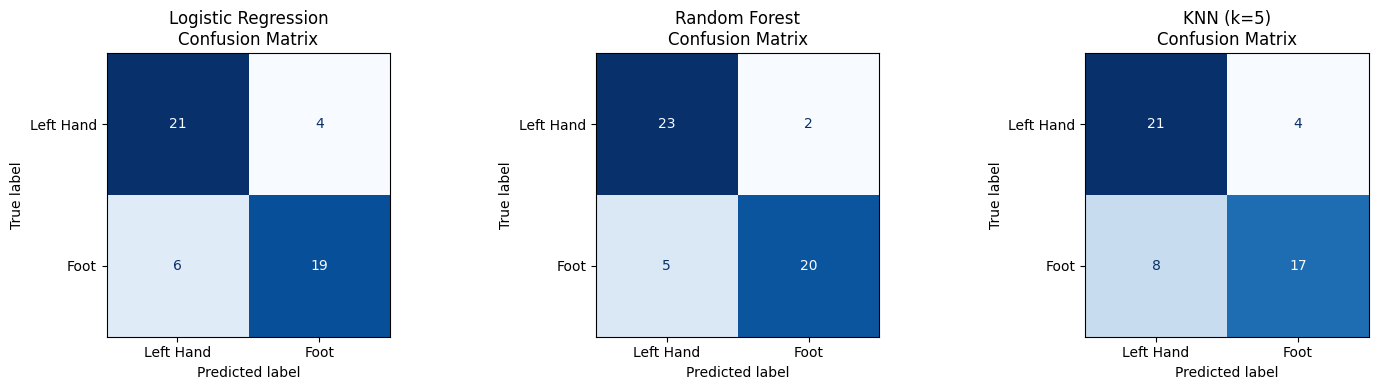

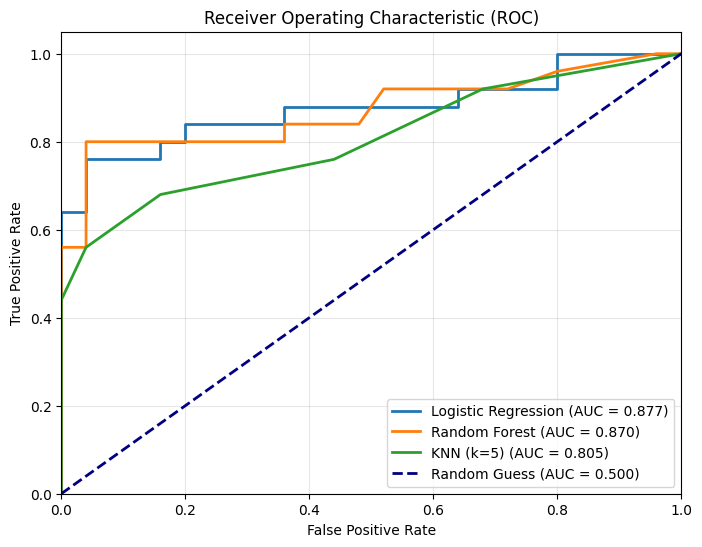

In [25]:
from src.evaluation import plot_multiple_confusion_matrices, plot_combined_roc_curve

# Plot Confusion Matrices
plot_multiple_confusion_matrices(models, X_test, y_test)

# Plot ROC curves
plot_combined_roc_curve(models, X_test, y_test)

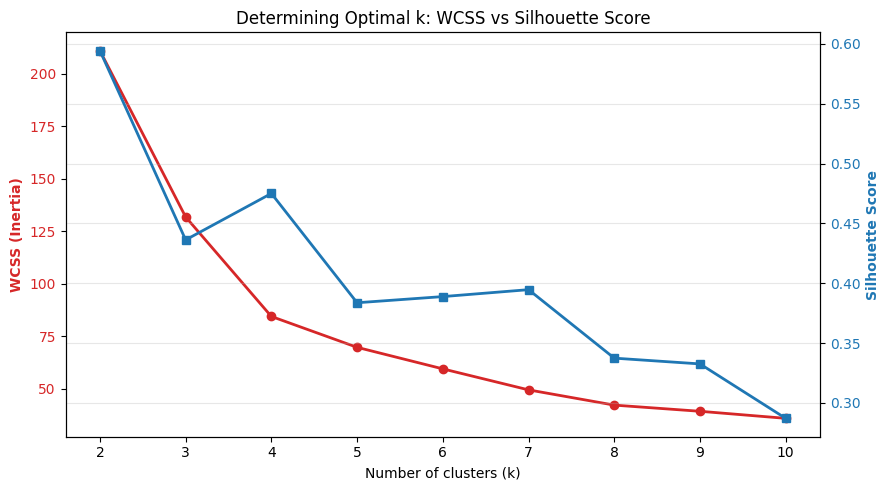

In [26]:
from src.k_means import evaluate_kmeans_k, plot_kmeans_metrics

# check k=2 through k=10
k_values, wcss, silhouette_scores = evaluate_kmeans_k(X_train)

# Plot the results
plot_kmeans_metrics(k_values, wcss, silhouette_scores)

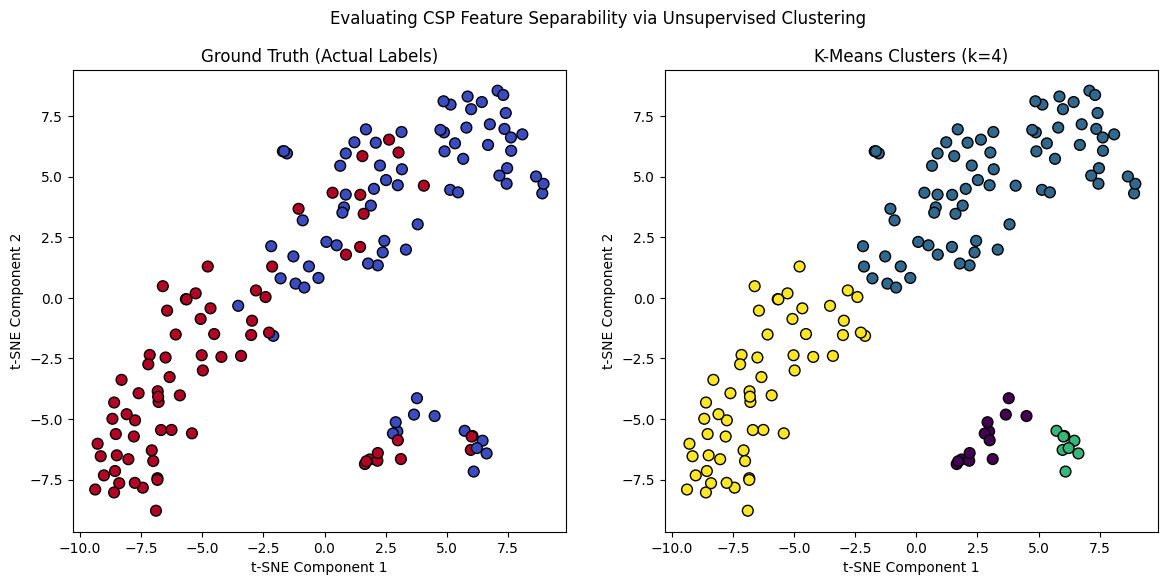

In [27]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from src.k_means import plot_kmeans_scatter

optimal_k = 4
# Train K-Means with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_train)


# we operated on the 4D CSP features we use t-SNE to draw them
tsne = TSNE(n_components=2, random_state=42)
X_train_2d = tsne.fit_transform(X_train)

# scattter plot
plot_kmeans_scatter(X_train_2d, y_train, cluster_labels, optimal_k)